<a href="https://colab.research.google.com/github/hrushikute/DataAnalytics/blob/master/02_neural_netwrok_model_for_classification_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Usually There type fo classificaiton
1. Binary Classification
2. Multiclass classification
3. Multilabel Classification


In [1]:
# Lets get the data for calssisfication

from sklearn.datasets import make_circles

In [2]:
#samples 
n_samples=1000

#create data 
X,y = make_circles(n_samples,noise=0.03)


In [3]:
X,y

(array([[-0.78073404,  0.20738423],
        [-0.40236053, -0.71664652],
        [-0.05712611,  0.76698605],
        ...,
        [-0.17039028, -0.80779106],
        [ 0.75348948,  0.63399553],
        [ 0.68538935, -0.76687997]]),
 array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 1, 0, 

In [4]:
import pandas as pd
circle_data = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"Label":y})
circle_data.head()

,X0,X1,Label
0,-0.780734,0.207384,1
1,-0.402361,-0.716647,1
2,-0.057126,0.766986,1
3,-0.714788,-0.686827,0
4,-0.718492,-0.708572,0


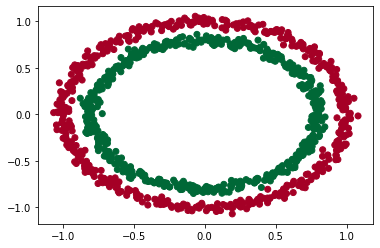

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlGn)

In [6]:

X_data = circle_data.drop('Label', axis=1)
y_data = circle_data["Label"]

X_data.head(), y_data.head()

(         X0        X1
 0 -0.780734  0.207384
 1 -0.402361 -0.716647
 2 -0.057126  0.766986
 3 -0.714788 -0.686827
 4 -0.718492 -0.708572, 0    1
 1    1
 2    1
 3    0
 4    0
 Name: Label, dtype: int64)

In [7]:

#Lets split the model for train and test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
len(X_train),len(X_test)

(800, 200)

In [8]:


import tensorflow as tf

In [9]:
# Lets create a model.
tf.random.set_seed(42)

# Create a model with one hidden layer
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)

])

# Comiple the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model.

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 4.4229 - accuracy: 0.4825
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 4.3331 - accuracy: 0.4538
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 4.2205 - accuracy: 0.4437
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 4.1717 - accuracy: 0.4300
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 4.1061 - accuracy: 0.4250
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 4.0219 - accuracy: 0.4225
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 3.9027 - accuracy: 0.4263
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 3.7884 - accuracy: 0.4325
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 3.7132 - accuracy: 0.4412
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 3.5587 - accuracy: 0.4462
Epoch 11/

# what ??? Just 48 % accuracy.
  Need to add change hyper parameters

In [10]:
tf.random.set_seed(42)

#create a model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)

])

#compile a model

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# foit the model

model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 4.1777 - accuracy: 0.4487
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 3.8955 - accuracy: 0.4575
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 3.4476 - accuracy: 0.4638
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 2.3134 - accuracy: 0.4638
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.8234 - accuracy: 0.4663
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7624 - accuracy: 0.4675
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7438 - accuracy: 0.4650
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7308 - accuracy: 0.4638
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7213 - accuracy: 0.4600
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7144 - accuracy: 0.4575
Epoch 11/

In [11]:
#Still 50 % lets add one more hidden layer of 100 neurons.
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_3.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 3.1775 - accuracy: 0.4663
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7197 - accuracy: 0.4663
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.4975
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5113
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4875
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4575
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4750
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.4625
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4613
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4837
Epoch 11/

In [12]:
model_3.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.4600


[0.700102686882019, 0.46000000834465027]

In [13]:
# Lets add the activation function with 2 hidden layers and learning rate as 0.001

In [14]:
tf.random.set_seed(42)

# Create a model

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

#Compile the model

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# fit the model

history_4 = model_4.fit(X_train,y_train,epochs=200)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.5138
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.5213
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6786 - accuracy: 0.5487
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5475
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6767 - accuracy: 0.5500
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.5550
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.5587
Epoch 8/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6746 - accuracy: 0.5537
Epoch 9/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6739 - accuracy: 0.5562
Epoch 10/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6733 - accuracy: 0.5600
Epoch 11/

In [15]:
model_4.evaluate(X_train, y_train)

25/25 [==============================] - 0s 1ms/step - loss: 0.1161 - accuracy: 0.9975


[0.11613127589225769, 0.9975000023841858]

In [16]:
# lets try that model to learn faster.

In [17]:
tf.random.set_seed(42)
# create a model
model_5=tf.keras.Sequential([
                             tf.keras.layers.Dense(5,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(5,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

#compile a model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

#fit the model
history_5=model_5.fit(X_train,y_train,epochs=25)


Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


25/25 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.4700
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.5150
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6786 - accuracy: 0.5337
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6716 - accuracy: 0.5813
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.5863
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6442 - accuracy: 0.6175
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6185 - accuracy: 0.6800
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5643 - accuracy: 0.8188
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4941 - accuracy: 0.8625
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.9200
Epoch 11/25
25/25 [===========

7/7 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 1.0000


[0.06091776490211487, 1.0]

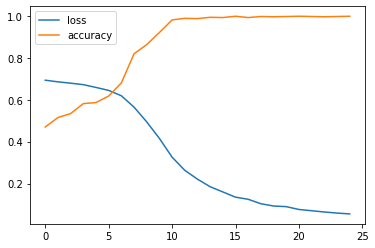

In [18]:
pd.DataFrame(history_5.history).plot()
model_5.evaluate(X_test,y_test)


**Learning Rate effect:**

So just by increasing the learning rate by 10% we are able to trian the model in 1/10th of epochs. 



#Confusion matrix

In [27]:
y_pred = model_5.predict(X_test)

model_5.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 1.0000


[0.06091776490211487, 1.0]

In [28]:
tf.math.confusion_matrix(y_test,y_pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 92,   0],
       [108,   0]], dtype=int32)>

Now this is showing very high false negative case. However accuracy is quite high

**Are we missing some thing?**

In [34]:
y_pred, y_test


(array([[4.6616793e-04],
        [7.2239041e-03],
        [8.1536472e-03],
        [8.3576030e-01],
        [9.4894898e-01],
        [9.4486070e-01],
        [9.3328941e-01],
        [6.9384575e-03],
        [7.6347888e-03],
        [9.4894898e-01],
        [9.4894898e-01],
        [7.0276219e-01],
        [1.8945336e-04],
        [1.7251343e-02],
        [1.2809038e-03],
        [3.2196343e-03],
        [9.4894898e-01],
        [3.2227039e-03],
        [3.2449961e-03],
        [9.3743676e-01],
        [1.5628731e-01],
        [9.4894898e-01],
        [6.7361742e-01],
        [9.4894898e-01],
        [9.4894898e-01],
        [9.4894898e-01],
        [5.7787299e-03],
        [9.1153002e-01],
        [8.8710237e-01],
        [9.4412529e-01],
        [4.4240952e-03],
        [8.7625438e-01],
        [9.5530152e-03],
        [9.4894898e-01],
        [1.6017911e-01],
        [9.5198154e-03],
        [9.4894898e-01],
        [4.3996274e-03],
        [3.5852194e-03],
        [9.1086972e-01],


So one is having probability and other is in binary. Cool

In [40]:
y_pred = tf.round(y_pred)
y_pred

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
 

In [42]:
tf.math.confusion_matrix(y_test, y_pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 92,   0],
       [  0, 108]], dtype=int32)>

Now it make sense